In [ ]:
#| default_exp introduction_to_control_problem

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| hide
from IPython.display import display, HTML
display(HTML("<link rel='stylesheet' href='https://maxcdn.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css'>"))

# Introduzione al problema del controllo

Ciao, cari lettori! Durante questo viaggio, abbiamo approfondito le meraviglie dei sistemi di controllo, discutendone le terminologie essenziali e le strutture di feedback. Esploriamo ulteriormente utilizzando più esempi del mondo reale per rafforzare la nostra comprensione.

## Servomeccanismo per il governo dell'antenna

Una tipica applicazione radar prevede il governo di un'antenna in modo tale che rimanga allineata con un bersaglio, come nel seguire un aereo in volo. Questo meccanismo di allineamento e tracciamento si ottiene utilizzando un servomeccanismo.

<table><tr>
<td> <img src="../pics/03_introduction_to_control_problem_antenna-tracking-system.png?1" alt="antenna-tracking-system" style="width: 250px;"/>
    <img src="../pics/03_introduction_to_control_problem_antenna-tracking-system-gopal.png?1" alt="antenna-tracking-system-gopal" style="width: 450px;"/>
</tr></table>

- segnale di comando per il servo: deviazione tra l'asse dell'antenna e la posizione del bersaglio
- questo è necessario per orientare l'antenna e ridurre l'errore a zero

Come osservi nel diagramma sopra, la configurazione della nostra antenna ha due principali gradi di libertà:

- Angolo di elevazione attorno all'asse orizzontale.
- Angolo di azimut (indicato come $\beta$) attorno all'asse verticale.

Ciò rende il nostro sistema multivariabile. Ma aspetta, c'è un modo per semplificarlo?

> **Bolla di pensiero**: ricordi uno scenario in cui possiamo trattare un sistema multivariabile quasi come una serie di sistemi con un solo input e un solo output?
Corretto! Se l'interazione (o l'accoppiamento) tra queste variabili può essere trascurata, possiamo progettare i nostri sistemi di controllo separatamente per ciascun grado di libertà.

Per chiarire, ingrandiamo il controllo dell'azimut ($\beta$).

### Diagramma a blocchi del controllo dell'azimut

<table><tr>
<td> <img src="../pics/03_introduction_to_control_problem_antenna-tracking-system-gopal-block-diagram.png" alt="antenna-tracking-system-gopal-block-diagram" style="width: 650px;"/>
</tr></table>

- L'angolo di azimut è $\beta$ (angolo controllato)
- Segnale di comando dato dal sensore radar: $\beta_r$
- Il 'Computer' esegue il rilevamento e il controllo degli errori, il che significa che abbiamo bisogno di un sensore adatto per leggere l'angolo $\beta$.
    - l'uscita dell'elemento di calcolo è $u$ (segnale manipolato)
- Encoder angolare: trasforma il segnale analogico $\beta$ (spostamento angolare) in un segnale digitale
- L'amplificatore di potenza ha generato il segnale che aziona il motore (motore di controllo dell'armatura CC) - modificare il livello di potenza per soddisfare i requisiti del motore
- Tra l'albero del motore e l'antenna abbiamo un **treno di ingranaggi** perché la coppia richiesta per spostare l'antenna è maggiore della coppia prodotta da un tipico motore.

### Tachimetrica
C'è una svolta nella nostra storia. Come avrai notato nel diagramma, abbiamo introdotto un ulteriore meccanismo di feedback tramite una dinamo tachimetrica.

La dinamo tachimetrica, fissata all'albero motore, produce un segnale di tensione proporzionale alla velocità dell'albero. _Ciò ci consente non solo di fornire feedback sulla posizione dell'antenna ma anche sul suo tasso di cambiamento (o velocità)._

- la velocità è la derivata della variabile controllata $\beta$.

> **Pop Quiz**: Riesci a pensare al motivo per cui il feedback sulla velocità potrebbe essere utile nel nostro sistema di controllo?

Questo doppio meccanismo di feedback è ciò che chiamiamo "controllo proporzionale più derivato". È un concetto essenziale nella progettazione del sistema di controllo, poiché aiuta a ottenere un controllo preciso considerando sia la posizione che la velocità di variazione.

Possiamo inserirlo nel nostro modulo di diagramma a blocchi standard:

<table><tr>
<td> <img src="../pics/03_introduction_to_control_problem_antenna-tracking-system-gopal-block-diagram-standard-form.png?1" alt="antenna-tracking-system-gopal-block-diagram-standard-form" style="width: 650px;"/>
</tr></table>

- Il carico è l'antenna.
- L'antenna, l'ingranaggio e l'albero motore rappresentano tutto il progetto. Se vogliamo elaborare un modello del sistema dobbiamo modellare tutto questo, il che in pratica significherà:
    - Conoscere il momento d'inerzia $J$ e l'attrito $B$.

## Controllo della velocità nell'industria

Il controllo della velocità è vitale in molti settori, soprattutto dove la coerenza è fondamentale. Pensa alle cartiere o agli impianti di produzione dell'acciaio, dove i rulli devono mantenere una velocità costante per produrre un prodotto uniforme, garantendo qualità e sicurezza del prodotto.

<table><tr>
<td> <img src="../pics/03_introduction_to_control_problem_speed-control-diagram-rollers.png?1" alt="speed-control-diagram-rollers" style="width: 650px;"/>
</tr></table>

Per garantire una velocità costante, nonostante disturbi come la variazione dello spessore del materiale o le fluttuazioni di potenza, utilizziamo un sistema di controllo.

<table><tr>
<td> <img src="../pics/03_introduction_to_control_problem_speed-control-diagram.png?1" alt="speed-control-diagram" style="width: 650px;"/>
</tr></table>

- Posizione velocità comandata: la posizione della velocità comandata è rappresentata da $\omega_r$. Nel diagramma illustrato, ciò indica la velocità comandata. Questo è il segnale di riferimento che viene confrontato con l'effettivo segnale di feedback proveniente dal sistema $\omega$.

- Meccanismo di feedback:
   - La dinamo tachimetrica, fissata all'albero motore, fornisce il feedback in questo sistema. Questo meccanismo cattura la velocità effettiva e invia un segnale di feedback al sistema principale.
     Per fornire un'immagine più chiara, immagina un motore CC (come illustrato nel nostro diagramma). La dinamo tachimetrica è accoppiata all'albero di questo motore. Il carico collegato a questo motore ha determinati parametri: $J$ (momento di inerzia) e $B$ (attrito viscoso).


- Traduzione della velocità in tensione:
    - La dinamo tachimetrica non genera direttamente un segnale di velocità. Genera invece un segnale di tensione proporzionale alla velocità. Questo è fondamentale perché significa che anche il nostro segnale di riferimento, $\omega_r$, sarà una tensione proporzionale alla velocità desiderata.
Pertanto, in questo sistema, il rilevatore di errori potrebbe essere un amplificatore operazionale (spesso chiamato amplificatore operazionale). Questo circuito operazionale accetta i segnali di tensione che rappresentano la velocità comandata e quella effettiva, li confronta e quindi genera un segnale proporzionale all'errore tra questi due segnali.

> Domanda: Perché in questo sistema la velocità viene tradotta in tensione?
Risposta: Serve per garantire che il feedback e i segnali di riferimento siano nello stesso formato (tensione) per il confronto da parte del rilevatore di errori.

- Adattamento del controllo digitale:
Per gli appassionati di uno schema di controllo digitale, l'introduzione di un blocco convertitore da A a D (da analogico a digitale) può digitalizzare il segnale analogico generato dal rilevamento dell'errore. Questo segnale digitale può quindi essere elaborato da un sistema informatico.

- Controllo dell'erogazione di potenza:

Lo scopo principale di questo schema di controllo è modulare la potenza fornita al motore in base alla differenza (errore) tra la posizione comandata e quella effettiva.

Nello schema fornito, questo è gestito da un raddrizzatore di controllo al silicio (SCR). Senza entrare ancora nelle specifiche dell'hardware, la struttura di feedback inerente allo schema di controllo rivela un controllo del trigger SCR. L'attivazione dell'SCR determina l'alimentazione del motore, influenzando così la coppia generata dal motore per raggiungere $\omega=\omega_r$.

Sia che $\omega_r$ sia un segnale che cambia nel tempo o un set point fisso, lo schema di controllo può funzionare sia come sistema di tracciamento che come regolatore. Approfondiremo più avanti questi tipi di applicazioni e i relativi controlli di velocità.

# Terminologia chiave
Mentre ci prepariamo ad approfondire questi sistemi, è essenziale familiarizzare con alcuni termini chiave:

- Processo/Impianto: questi termini possono essere usati in modo intercambiabile. La loro comprensione è cruciale.
- Attuatore: Richiama la sua funzione - regolare il livello di potenza del segnale di controllo per renderlo compatibile con il motore o l'impianto.
- Controller: Si compone principalmente di due sottosistemi:
      - Rilevatore di errore: confronta il segnale di riferimento o di comando con il segnale effettivamente controllato.
      - Logica di controllo: definisce come il sistema risponde all'errore. Gli esempi includono la logica proporzionale semplice o la logica proporzionale più derivativa più complessa, ecc.

- Sensore: il ruolo del sensore è fondamentale. Genera un segnale di feedback per allinearsi al segnale di riferimento o di comando, consentendo al rilevatore di errori di confrontare e agire.

In una progettazione model-based, comprendere e costruire il modello matematico di questi sottosistemi è fondamentale. I modelli matematici saranno integrati per rappresentare il sistema complessivo di controllo del feedback.

# Modelli matematici dei sistemi fisici

I sistemi di controllo svolgono un ruolo fondamentale nei moderni progressi tecnologici, dagli elettrodomestici all’esplorazione spaziale. Per progettare e analizzare questi sistemi, è essenziale creare innanzitutto modelli matematici dei processi fisici sottostanti. I modelli matematici fungono da rappresentazioni astratte, aiutando ingegneri e scienziati a prevedere il comportamento del sistema in varie condizioni. Questo capitolo approfondisce i concetti e le tecniche fondamentali per la formulazione di questi modelli, traendo ispirazione principalmente dal lavoro fondamentale di Nagrath e Gopal nel loro libro sui sistemi di controllo.

## Perché i modelli matematici?

Definizione: un modello matematico è una rappresentazione astratta di un sistema fisico sotto forma di equazioni matematiche. Descrive il comportamento del sistema e come risponde ai vari input.

Benefici:

- Analisi predittiva: consente previsioni sul comportamento futuro.
- Ottimizzazione del sistema: facilita le regolazioni per prestazioni ottimali.
- Simulazione: consente la simulazione del sistema prima dell'effettiva implementazione.
- Conveniente: riduce la necessità di test nel mondo reale costosi e dispendiosi in termini di tempo.

## Tipi di sistemi fisici:
I sistemi fisici possono essere ampiamente classificati in base alla loro natura intrinseca:

- **Sistemi lineari e non lineari**: i sistemi lineari obbediscono al principio di sovrapposizione e omogeneità, mentre i sistemi non lineari no.
- **Sistemi invarianti rispetto al tempo rispetto a sistemi variabili nel tempo**: nei sistemi invarianti nel tempo, i parametri non cambiano con il tempo. Al contrario, lo fanno nei sistemi con varianti temporali.
- **Sistema a tempo continuo e a tempo discreto**: i sistemi a tempo continuo operano in un intervallo di tempo continuo, mentre i sistemi a tempo discreto operano a intervalli specifici.

## Passaggi nella formulazione di modelli matematici:

1. Identificazione del sistema: determinare il tipo di sistema (ad esempio, meccanico, elettrico, termico).
2. Semplificazione: fare approssimazioni ragionevoli e trascurare gli effetti insignificanti.
3. Selezione delle variabili: scegliere le variabili di stato appropriate per descrivere il sistema.
4. Applicazione delle leggi fondamentali: applicare le leggi fondamentali (come la legge di Ohm per i sistemi elettrici, le leggi di Newton per i sistemi meccanici) per derivare le equazioni.
5. Rappresentazione: utilizzare equazioni differenziali, funzioni di trasferimento o modelli nello spazio degli stati secondo necessità.

## Sistemi lineari invarianti nel tempo
Nelle nostre prossime discussioni, tutti i sistemi saranno lineari invarianti nel tempo. Pertanto, la nostra attenzione si concentrerà sulla modellazione di questi tipi di sistemi. Si presume che ad un certo punto dei tuoi studi ti sia imbattuto nella modellazione di vari sistemi, come sistemi elettrici, meccanici, fluidici o termici.

Quando risolviamo il modello matematico di un sistema fisico in diversi scenari di input, il risultato descrive il comportamento dinamico del sistema.

> <i class="fa fa-lightbulb-o" aria-hidden="true"></i>
Il modello matematico di un sistema è considerato lineare se aderisce ai principi di sovrapposizione e omogeneità.

se un modello di sistema ha risposte $y_1(t)$ e $y_2(t)$ a due input qualsiasi $x_1(t)$ e $x_2,(t)$, la risposta del sistema alla combinazione lineare di questi input:

$$ \alpha_1 x_1(t) + \alpha_2 x_2(t) $$

è data dalla combinazione lineare delle singole risposte:

$$ \alpha_1 y_1(t) + \alpha_2 y_2(t) $$

Prima di approfondire ulteriormente, sarà utile un riepilogo delle leggi fisiche fondamentali, così come si applicano ai sistemi lineari invarianti nel tempo. Sebbene possa sembrare ripetitivo, ciò garantirà che tutti siano sulla stessa pagina e comprendano la terminologia.

- L'applicazione delle leggi fondamentali della fisica fornirà equazioni differenziali. Tuttavia, queste equazioni potrebbero non essere direttamente utilizzabili per l'analisi o la progettazione e devono essere trasformate in una forma più utile per il controllo.

Esistono due forme principali nei sistemi di controllo che spesso vengono sfruttati:
1. modelli a variabili di stato
2. funzioni di trasferimento.

> <i class="fa fa-lightbulb-o" aria-hidden="true"></i>
Le equazioni differenziali spesso caratterizzano le rappresentazioni matematiche di molti sistemi fisici. Un modello è considerato lineare quando l'equazione differenziale che lo definisce possiede coefficienti che dipendono esclusivamente dalla variabile indipendente o rimangono costanti. Se questi coefficienti cambiano nel tempo (dove il tempo è la variabile indipendente), il modello è descritto come lineare nel tempo. Al contrario, se i coefficienti rimangono costanti, il modello è etichettato come lineare invariante nel tempo.

## Modelli delle variabili di stato

Utilizzando un semplice circuito elettrico come esempio possiamo illustrare il concetto di modelli con variabili di stato.

In questo circuito, la variabile di input è $e_i$. La variabile di output, in qualsiasi sistema, è l'attributo del focus. Nel nostro esempio, potrebbe essere la corrente attraverso un elemento o la tensione attraverso un elemento.

<table><tr>
<td> <img src="../pics/03_introduction_to_control_problem_state-variable-model-simple-circuit-precise-with-current.png?1" alt="state-variable-model-simple-circuit" style="width: 650px;"/>
</tr></table>

In questo caso, se conosciamo la tensione attraverso il condensatore $e(t)$ e la corrente attraverso l'induttore $i(t)$, possiamo ricavare qualsiasi altra variabile di interesse.

- **Variabili caratterizzanti**: $e(t)$ e $i(t)$ caratterizzano completamente il sistema (una semplice rete elettrica in questo caso)

Qualsiasi output di interesse può essere ottenuto in funzione di queste variabili
- Ad esempio l'energia immagazzinata nel condensatore è data da:
  $$ \frac{1}{2}Ce^2$$

- Ad esempio l'energia immagazzinata nell'induttore è data da:
  $$ \frac{1}{2}Li^2$$


I cambiamenti dinamici nelle nostre variabili caratterizzanti, $e(t)$ e $i(t)$, indicano la ridistribuzione dell'energia all'interno del sistema. Il riconoscimento di queste variabili, che rappresentano lo stato energetico, fornisce una visione completa del comportamento del sistema.

Come ottengo $e(t)$ e $i(t)$:
- $e(t)$ e $i(t)$ in qualsiasi momento $t \ge 0$ sono a mia disposizione se:
     - Sono noti $e(0), i(0)$ a $t = 0$ (stato energetico iniziale del sistema)
     - L'input esterno $e_i(t)$ è noto per $t \ge 0$
 
Chiamiamo $e(t)$ e $i(t)$ **variabili di stato**.

### Definizione (informale) della variabile di stato

> Le variabili di stato sono un insieme di variabili caratterizzanti che forniscono in ogni momento l'informazione totale sul sistema, a condizione dello stato iniziale e dell'input esterno.

Tornando al nostro impianto elettrico:

- Parametro di resistenza: $R$
- Capacità: $C$
- Induttanza: $L$
- Corrente: $i$

Applicazione delle leggi fondamentali:

L'equazione del ciclo è data da:
$$
e_i= R i + e + \frac{Ldi}{dt}
$$

E anche:

$$
i = C\frac{de}{dt}
$$

Queste due equazioni costituiscono il nostro modello di sistema matematico.

#### Modello delle variabili di stato del circuito
Una volta adottato il nostro modello matematico, procediamo al modello delle variabili di stato.

L'obiettivo qui è fare in modo che il modello esprima le derivate delle nostre variabili caratterizzanti. Per questo sistema le variabili caratterizzanti sono $e(t)$ e $i(t)$.

Questo significa:

$$
\frac{de(t)}{dt} = \frac{1}{C}i(t)
$$

$$
\frac{di(t)}{dt} = \frac{R}{L}i(t) + \frac{1}{L}e(t) + \frac{1}{L}e_i(t)
$$

Per facilità di rappresentazione e standardizzazione, definiamo:

$$x_1=e(t)$$
$$x_2=i(t)$$

e chiamo la variabile di input:

$$
r=e_i(t)
$$

Quindi il modello del sistema in forma di variabile di stato è:



$$
\begin{allineato}
    \frac{dx_1}{dt} &= \frac{1}{C} x_2 \\
    \frac{dx_2}{dt} &= \frac{R}{L} x_2 + \frac{1}{L} x_1 + \frac{1}{L} R
\end{allineato}
$$

Queste equazioni insieme rappresentano le equazioni di stato del sistema.

**Informazioni in uscita**: È fondamentale sapere quali informazioni ci interessano o cosa desideriamo osservare dal sistema.

Supponiamo di essere interessati alla tensione ai capi dell'induttore $y(t)$. Utilizzando le variabili di stato fornite, possiamo esprimere:

$$
y(t) = -Ri - e + e_i = -Rx_2 - x_1+r
$$

Questa equazione è un'**equazione di output**, che mostra come l'output dipende dal nostro stato e dalle variabili di input.

## Modello standard delle variabili di stato

Il modello generalizzato delle variabili di stato per un sistema con variabili di stato $ n $, un input e un output è rappresentato dalle seguenti equazioni differenziali matrice-vettore:


\begin{allineato}
\dot{\mathbf{x}}(t) &= \mathbf{A} \mathbf{x}(t) + \mathbf{b} u(t) \\
y(t) &= \mathbf{c} \mathbf{x}(t) + d u(t)
\end{allineato}

Dove:

- $ \mathbf{x}(t) $ è il vettore di stato di dimensione $ n \times 1 $:

$$
\mathbf{x}(t) = \begin{bmatrice}
x_1(t) \\
x_2(t) \\
\vpunti \\
x_n(t)
\end{bmatrice}
$$

- $ u(t) $ è un input scalare
- $ y(t) $ è un output scalare


- $ \mathbf{A} $ è la **matrice di sistema** di dimensione $ n \times n $
- $ \mathbf{b} $ è il **vettore di input** della dimensione $ n \times 1 $
- $ \mathbf{c} $ è il **vettore di output** di dimensione $ 1 \times n $
- $ d $ è la **matrice di trasmissione diretta** di dimensione $ 1 \times 1 $.

Possiamo generalizzarlo a un sistema con variabili di stato $ n $, input $ m$ e output $ p $

\begin{allineato}
\dot{\mathbf{x}}(t) &= \mathbf{A} \mathbf{x}(t) + \mathbf{B} \mathbf{u}(t) ​​\\
\mathbf{y}(t) &= \mathbf{C} \mathbf{x}(t) + \mathbf{D} \mathbf{u}(t)
\end{allineato}

Dove:

- $ \mathbf{x}(t) $ è il vettore di stato di dimensione $ n \times 1 $:

$$
\mathbf{x}(t) = \begin{bmatrice}
x_1(t) \\
x_2(t) \\
\vpunti \\
x_n(t)
\end{bmatrice}
$$

- $ \mathbf{A} $ è la matrice del sistema di dimensione $ n \times n $.
- $ \mathbf{B} $ è la matrice di input di dimensione $ n \times m $ (assumendo che ci siano $ m $ input).
- $ \mathbf{C} $ è la matrice di output di dimensione $ p \times n $ (assumendo che ci siano output $ p $).
- $ \mathbf{D} $ è la matrice di trasmissione diretta di dimensione $ p \times m $.
- $ \mathbf{u}(t) ​​$ è il vettore di input.
- $ \mathbf{y}(t) $ è il vettore di output.

Questo formato viene spesso definito come la rappresentazione "nello spazio degli stati" dei sistemi dinamici. Fornisce un modo compatto e modulare per descrivere il comportamento di un'ampia gamma di sistemi, inclusi quelli elettrici, meccanici, termici e altri.

### Terminologia

- Le lettere minuscole in grassetto o le lettere minuscole sottolineate indicano i vettori.
- Le lettere maiuscole in grassetto o le lettere maiuscole sottolineate indicano le matrici.
- Nessuna sottolineatura indica uno scalare.

# Ammortizzatore a molla di massa

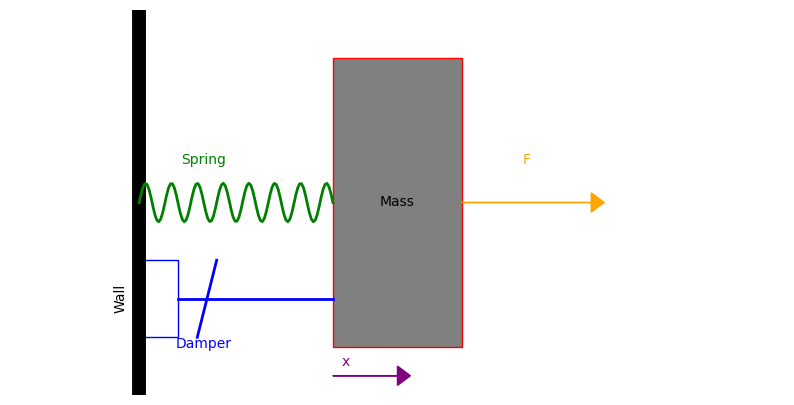

In [ ]:
#| export
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_mass_spring_damper(position=0.5, force=1.0):
    fig, ax = plt.subplots(figsize=(10, 5))

    # Draw wall
    ax.plot([-1, -1], [0, 2], color='k', lw=10)
    ax.text(-1.2, 0.5, 'Wall', rotation='vertical', va='center')

    # Draw spring
    x_spring = np.linspace(-1, position, 100)
    y_spring = 1 + 0.1 * np.sin(10 * np.pi * x_spring)
    ax.plot(x_spring, y_spring, 'g', lw=2)
    ax.text(-0.5, 1.2, 'Spring', color='g', ha='center')

    # Draw damper
    damper_length = position + 1
    damper_rect_width = damper_length / 5.0
    damper_rect = patches.Rectangle((-1, 0.3), damper_rect_width, 0.4, linewidth=1, edgecolor='b', facecolor='white')
    ax.add_patch(damper_rect)
    ax.plot([-1 + damper_rect_width, position], [0.5, 0.5], 'b', lw=2)
    ax.plot([-1 + damper_rect_width * 1.5, -1 + damper_rect_width * 2], [0.3, 0.7], 'b', lw=2)
    ax.text(-0.5, 0.3, 'Damper', color='b', ha='center', va='top')

    # Draw mass (as cart)
    cart_rect = patches.Rectangle((position, 0.25), 1, 1.5, linewidth=1, edgecolor='r', facecolor='gray')
    ax.add_patch(cart_rect)
    ax.text(position + 0.5, 1, 'Mass', ha='center', va='center')

    # Draw Force
    ax.arrow(position + 1, 1, force, 0, head_width=0.1, head_length=0.1, fc='orange', ec='orange')
    ax.text(position + 1 + force/2, 1.2, 'F', color='orange', ha='center')

    # Draw displacement
    ax.arrow(0.5, 0.1, position, 0, head_width=0.1, head_length=0.1, fc='purple', ec='purple')
    ax.text(0.6, 0.15, 'x', color='purple', ha='center')

    ax.set_xlim(-2, 3 + force)
    ax.set_ylim(0, 2)
    ax.axis('off')
    plt.show()

draw_mass_spring_damper(position=0.5, force=1.0)


Consideriamo il sistema fisico di un ammortizzatore massa-molla:

- Messa: $M$
- Costante della molla: $K$
- Coefficiente di smorzamento: $B$
- Forza esterna: $F(t)$
- Spostamento del carrello dall'equilibrio: $x$

Per prima cosa scriviamo l'equazione differenziale del sistema e poi manipoleremo l'equazione differenziale per averla nella forma standard della variabile di stato.

Utilizzando la seconda legge di Newton, l'equazione differenziale governante è:

$$
F(t) = M \frac{dv}{dt} + B v + Kx
$$

Dove:
- $v$ è la variabile della velocità

Questa equazione può essere trasformata in un modello con variabili di stato.

In questo caso $x(t)$ (Spostamento) e $v(t)$ sono le variabili caratterizzanti.

Possiamo quindi definire le variabili di stato come:
- $x_1 = x(t)$ (Spostamento)
- $x_2 = v(t)$ (Velocità)


Ciò significa, per la prima variabile di stato:
$$
\frac{dx}{dt} = v
$$

e in termini di variabili di stato
$$
\punto{x_1} = x_2
$$

e per la seconda variabile di stato, devo considerare l'equazione differenziale originale:

$$
\frac{dv}{dt} = -\frac{K}{M} x - \frac{B}{M} v + \frac{1}{M} F(t)
$$

e ora in termini di variabili di stato:

$$
\dot{x_2} = -\frac{K}{M} x_1 - \frac{B}{M} x_2 + \frac{1}{M} u
$$



> **Domanda**: Perché abbiamo due equazioni? Abbiamo due variabili di stato.

Il vettore di stato è:
$$
\underline{x}(t) = \begin{bmatrice}
x_1(t) \\
x_2(t) \\
\end{bmatrice} = = \begin{bmatrice}
X \\
v(t) \\
\end{bmatrice}
$$


La matrice degli stati è:

$$
\underline{A} = \begin{bmatrice}
0 e 1\\
-\frac{K}{M} & -\frac{B}{M} \\
\end{bmatrice}
$$

Il vettore di input è:

$$
\underline{b} = \begin{bmatrice}
0 \\
\frac{1}{M}\\
\end{bmatrice}
$$

$\underline{c}$ e $d$ dipendono dalla variabile di output scelta.


Nel contesto del nostro sistema massa-molla-ammortizzatore, se consideriamo lo spostamento della massa come la nostra variabile di output, ciò significa la necessità dell'utente di controllare questo spostamento. Questo requisito specifico determina la variabile di output di interesse. In questo scenario, l’obiettivo è esprimere la variabile di output in termini di variabili di stato.


Se lo spostamento della massa è l'output, allora l'**equazione dell'output** diventa:

$$
y(t) = x = \underline{c} \underline{x} + d u(t)
$$

da cui:

$$
\underline{c} = \begin{bmatrice}
1 e 0 \\
\end{bmatrice}
$$


$$
d = 0
$$

e ora abbiamo il modello completo delle variabili di stato standard:


\begin{allineato}
\dot{\underline{x}}(t) &= \underline{A} \underline{x}(t) + \underline{b} u(t) \\
y(t) &= \underline{c} \underline{x}(t) + d u(t)
\end{allineato}

Nota:

\begin{allineato}
\dot{\underline{x}}(t) &= \underline{A} \underline{x}(t) + \underline{b} u(t) \\
\end{allineato}

è chiamata **equazione di stato**.

## Comprensione delle variabili di stato

Per accentuare un aspetto cruciale, negli esempi condivisi in precedenza, abbiamo considerato le variabili fisiche come variabili di stato del sistema. Tuttavia, è importante notare che le variabili di stato vengono introdotte principalmente per comodità matematica.

> Le variabili di stato non devono essere sempre variabili fisiche. Possono essere definiti in base a esigenze matematiche o di modellizzazione.

- Le variabili di input e output devono essere variabili fisiche.

Possiamo definire $ x_1 $ come $ x(t) + v(t) $ e $ x_2 $ solo come $ v(t) $?

La risposta è, teoricamente, sì.

- $x_2$ rimane la velocità, $x_1$ - la somma di spostamento e velocità - non corrisponde a una variabile fisica distinta.
- La somma dello spostamento e della velocità è un valore numerico, senza significato fisico.
- Quindi, sebbene $x_1$ e $x_2$ non siano variabili fisiche indipendenti, le equazioni di stato possono comunque essere definite nei loro termini.

- L'output risultante può essere rappresentato utilizzando $x_1$ e $x_2$, sebbene l'equazione di output potrebbe differire dal caso precedente. Tuttavia, per ogni input, l’output rimane definito in modo univoco.

Le variabili di stato, come $x_1$ e $x_2$, non sono univoche. Possono essere ridefiniti in innumerevoli modi, ma per ogni input specifico è garantito un output unico. Queste variabili di stato sono in gran parte questioni di convenienza. A seconda delle esigenze di analisi e progettazione, le variabili di stato possono variare.


Per illustrare, rivisitiamo il nostro esempio di circuito elettrico. In precedenza abbiamo riconosciuto la tensione del condensatore come una variabile di stato. Tuttavia, non esiste alcun vincolo che ci impedisca di selezionare la carica immagazzinata nel condensatore come variabile di stato. Indipendentemente dal fatto che la variabile di stato sia designata come $q$ (carica) o $e$ (tensione), per un dato input, l'output rimane coerente in tutte le definizioni delle variabili di stato.